In [4]:
from scipy.ndimage import convolve
import skimage as sk
import numpy as np
import matplotlib.pyplot as plt

In [6]:
height_mask = sk.io.imread('./../ppujol/dome70_2/maskedImage3D.tif')

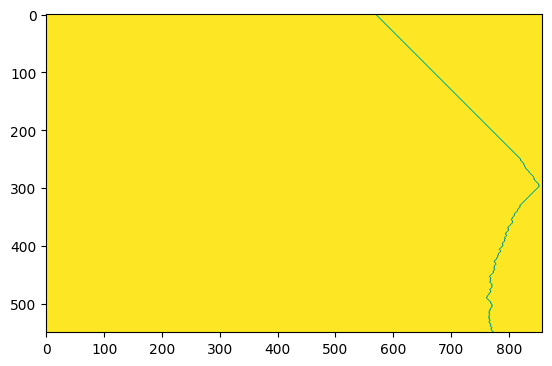

In [17]:
# Seam Carving

y = 430

def calc_energy(img):
    filter_du = np.array([
        [1.0, 2.0, 1.0],
        [0.0, 0.0, 0.0],
        [-1.0, -2.0, -1.0],
    ])

    filter_dv = np.array([
        [1.0, 0.0, -1.0],
        [2.0, 0.0, -2.0],
        [1.0, 0.0, -1.0],
    ])

    img = img.astype('float32')
    energy_map = np.absolute(convolve(img, filter_du)) + np.absolute(convolve(img, filter_dv))

    return energy_map

energy = calc_energy(height_mask[y])

plt.imshow(energy)


def minimum_seam(img):
    r, c = img.shape
    energy_map = calc_energy(img)

    M = energy_map.copy()
    backtrack = np.zeros_like(M)

    for i in range(1, r):
        for j in range(0, c):
            # Handle the left edge of the image, to ensure we don't index -1
            if j == 0:
                idx = np.argmin(M[i - 1, j:j + 2])
                backtrack[i, j] = idx + j
                min_energy = M[i - 1, idx + j]
            else:
                idx = np.argmin(M[i - 1, j - 1:j + 2])
                backtrack[i, j] = idx + j - 1
                min_energy = M[i - 1, idx + j - 1]

            M[i, j] += min_energy

    return M, backtrack


M, backtrack = minimum_seam(height_mask[y])

# plt.imshow(M)


def carve_column(img):
    r, c = img.shape

    M, backtrack = minimum_seam(img)

    # Create a (r, c) matrix filled with the value True
    # We'll be removing all pixels from the image which
    # have False later
    mask = np.ones((r, c))

    # Find the position of the smallest element in the
    # last row of M
    j = np.argmin(M[-1])

    for i in reversed(range(r)):
        # Mark the pixels for deletion

        i = int(i)
        j = int(j)

        mask[i, j] = 0
        j = backtrack[i, j]

    # Since the image has 3 channels, we convert our
    # mask to 3D
    

    # Delete all the pixels marked False in the mask,
    # and resize it to the new image dimensions

    # plt.imshow(mask)

    #img = img[mask].reshape((r, c - 1))

    return mask

plt.imshow(carve_column(height_mask[y]))
# 
# carve_column(np.rot90(np.argmax(height_mask)-height_mask));